# Visualizing the benchmark
This notebook offers a straightforward way to visualize the benchmark results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotting import benchmarkParse, appendFFTMflops, plotBenchmark, benchRank

### loading the benchmark json file

_Use this section to load and parse any of the benchmark results by using the benchmarkParse() function_

An example is shown below loading full benchmark data, singular library benchmark data, and appending data

In [2]:
#parsing the general benchamrks
data_bench = benchmarkParse('benchmarks/results.json')
data_juce = benchmarkParse('benchmarks/results_juce.json')

#parsing pffft benchmarks
pffft_scalar = benchmarkParse('benchmarks/results_pffft_scalar.json')
pffft_neon = benchmarkParse('benchmarks/results_pffft_neon.json')

#appending the two pffft benchmarks into one dataframe
pffft_neon['library'] = pffft_neon['library'] + '_neon'
pffft_scalar['library'] = pffft_scalar['library'] + '_scalar'
pffft = pd.concat([pffft_neon,pffft_scalar])

pffft.head()

,library,sampleNumber,iterations,real_time,cpu_time,time_unit
0,pffft_neon,16,28000000,23.800918,23.437500,ns
1,pffft_neon,32,10000000,50.880650,50.000000,ns
2,pffft_neon,64,6400000,108.421078,109.863281,ns
3,pffft_neon,128,2986667,236.541268,235.421291,ns
4,pffft_neon,256,1000000,535.355200,531.250000,ns


_(optional) if fft and biquad data are in the same output file, you can seperate them form each other and append some other libraries_

In [3]:
#split fft and biquad in juce library output
lastFFTindex = 11
data_juce_fft = data_juce.iloc[:lastFFTindex,:]
data_juce_biquad = data_juce.iloc[lastFFTindex:,:]

#split fft and biquad in general output
lastFFTindex = 76
data_fft = data_bench.iloc[:lastFFTindex,:]
data_biquad = data_bench.iloc[lastFFTindex:,:]

#appending juce to the other libraries
data_fft = data_fft._append(data_juce_fft)
data_biquad = data_biquad._append(data_juce_biquad)

#print unique libraries in the dataframe
print('FFT libraries: ' + str(data_fft['library'].unique()) + '\n')
print('Biquad libraries: ' + str(data_biquad['library'].unique()))

FFT libraries: ['muFFT' 'pffft' 'PocketFFT<double>' 'PocketFFT<float>' 'meowfft' 'qfft'
 'jucefft']

Biquad libraries: ['moog' 'snd' 'maxiBiquadProcess<float>' 'maxiBiquadProcess<double>'
 'bela' 'sst' 'cmsis_dsp_float' 'cmsis_dsp_double' 'Iir' 'q<float>'
 'q<double>' 'jucebiquad']


### MFLOPS conversion of FFT performance Data

_This is following the MFLOPS estimation where MFLOPS = 5*N*log2(N) / (time to perform 1 fft operation)_

Frigo, M. and Johnson, S.G. (2005) ‘The design and implementation of FFTW3’, Proceedings of the IEEE, 93(2), pp. 216–231. doi:10.1109/jproc.2004.840301. 

In [4]:
data_fft = appendFFTMflops(data_fft)
pffft = appendFFTMflops(pffft)
pffft.head()

,library,sampleNumber,iterations,real_time,cpu_time,time_unit,MFLOPS
0,pffft_neon,16,28000000,23.800918,23.437500,ns,13.653333
1,pffft_neon,32,10000000,50.880650,50.000000,ns,16.000000
2,pffft_neon,64,6400000,108.421078,109.863281,ns,17.476267
3,pffft_neon,128,2986667,236.541268,235.421291,ns,19.029715
4,pffft_neon,256,1000000,535.355200,531.250000,ns,19.275294


_Outputing into latex table_

In [5]:
with open('results/data_fft.tex','w') as f:
    f.write(data_fft.to_latex(index=False,escape=True))
with open('results/data_biquad.tex','w') as f:
    f.write(data_biquad.to_latex(index=False,escape=True))


### Plotting FFT Libraries

replace <code>data_fft</code> by the dataframe you want to plot

plotting all libraries


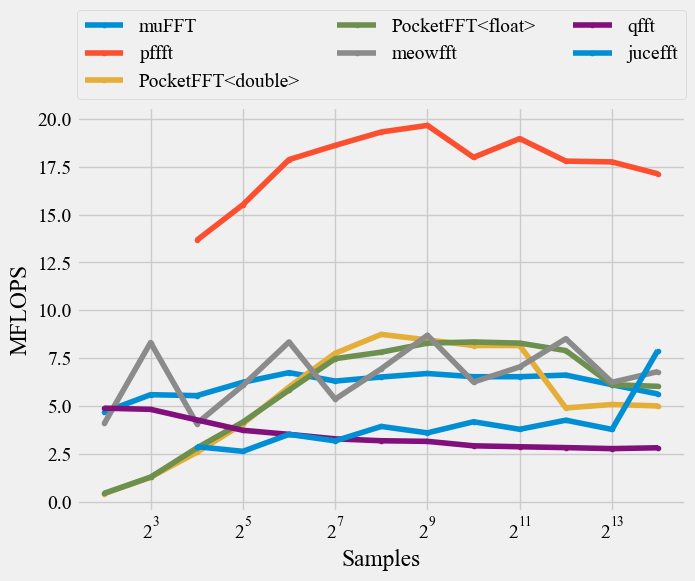

plotting all libraries


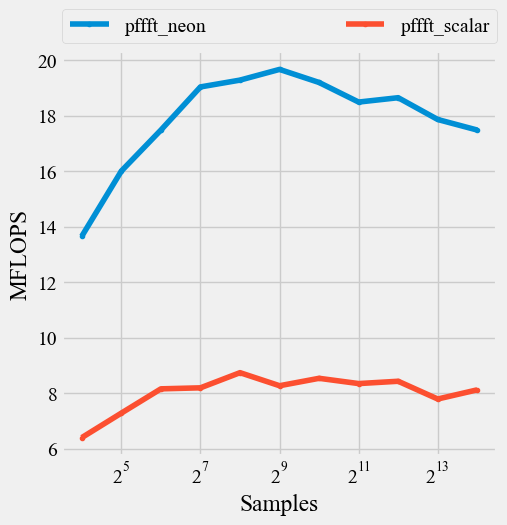

In [6]:
figure = plotBenchmark(data_fft, property='MFLOPS', isLog=False, size=[7,5])
figure.savefig('results/figure_fft.pdf')
plt.show()

figure_pffft = plotBenchmark(pffft, property='MFLOPS', isLog=False)
figure.savefig('results/figure_pffftComparison.pdf')
plt.show()

### Plotting Biquad Libraries

plotting all libraries


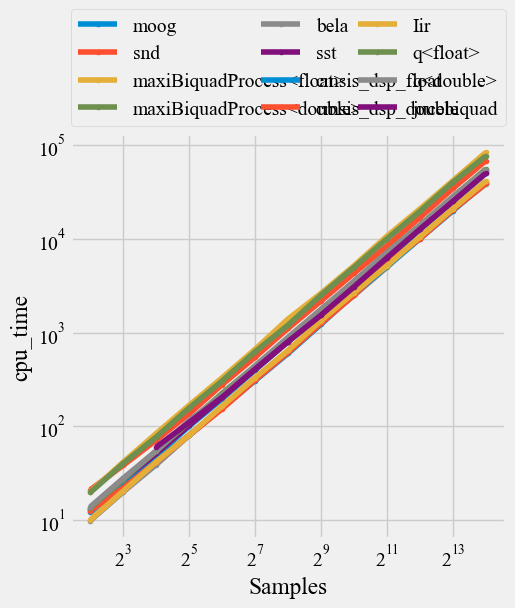

In [7]:
figure = plotBenchmark(data_biquad)
figure.savefig('results/figure_biquad.pdf')
plt.show()

### Plotting specific libraries example

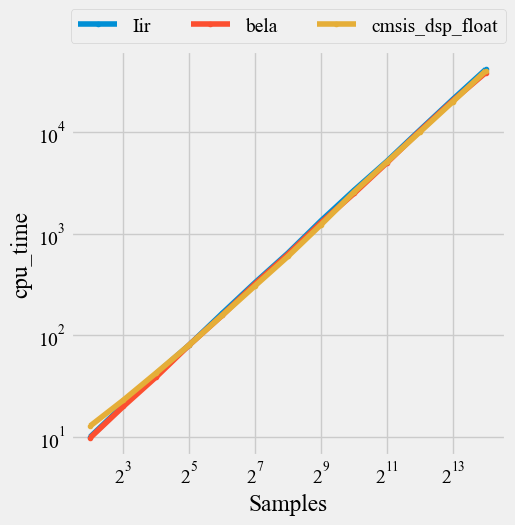

In [8]:
libs = ['Iir','bela','cmsis_dsp_float']
figure = plotBenchmark(data_biquad,libraries=libs)
plt.show()

### Ranking libraries

_change <code>samples</code> to get the ranking of the library performances for that sample buffer length_

In [9]:
ranked_biquad = benchRank(data_biquad, property='real_time', rankRange=[6,14])

#with open('results/ranked_biquad.tex','w') as f:
#    f.write(ranked_biquad.to_latex(index=False,escape=True))
pd.set_option('display.max_rows', None)
ranked_biquad.head()

,sampleNumber,library,cpu_time,real_time,time_unit
171,64,cmsis_dsp_double,157.239665,157.239665,ns
158,64,cmsis_dsp_float,157.280424,157.280424,ns
132,64,bela,159.392723,159.392723,ns
184,64,Iir,163.778616,163.778616,ns
80,64,moog,197.082044,197.082044,ns


In [10]:

ranked_fft = benchRank(data_fft, property='real_time', rankRange=[4,10])

with open('results/ranked_fft.tex','w') as f:
    f.write(ranked_fft.to_latex(index=False,escape=True))

ranked_fft.head()


,sampleNumber,library,cpu_time,real_time,time_unit
13,16,pffft,24.030250,24.030250,ns
2,16,muFFT,57.408540,57.408540,ns
65,16,qfft,74.723080,74.723080,ns
52,16,meowfft,77.265725,77.265725,ns
0,16,jucefft,111.142839,111.142839,ns
